# ⚖️ Critères de Choix et Benchmarks - Guide Pratique

## 🎯 Objectifs
- **Maîtriser** les critères essentiels de sélection d'un LLM
- **Comprendre** les métriques et benchmarks
- **Utiliser** les outils d'évaluation
- **Calculer** le coût total de possession (TCO)

---

## 🤷‍♂️ Le Problème du Choix

Imaginez que vous devez choisir une voiture :
- 🏎️ **Ferrari** : Super rapide mais coûte 300k€
- 🚗 **Toyota** : Fiable, 25k€, économique
- 🛻 **Pick-up** : Parfait pour transporter, 40k€

**Question** : Laquelle choisir ?
**Réponse** : Ça dépend de vos besoins !

Même problème avec les LLM... mais avec plus de critères ! 😅

## 📦 Installation et Setup

In [1]:
# Installation
!pip install requests pandas matplotlib seaborn plotly numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✅ Imports terminés !")

✅ Imports terminés !


## 📊 Les 7 Critères Essentiels

### 1. 🎯 Performance (Qualité des Réponses)
**Comment mesurer :**
- **MMLU** : Connaissances générales
- **HellaSwag** : Bon sens
- **HumanEval** : Génération de code
- **MT-Bench** : Conversations multi-tours

### 2. 💰 Coût (Budget)
**Types de coûts :**
- **API** : Prix par token/requête
- **Hébergement** : Serveurs, GPU
- **Développement** : Temps d'intégration
- **Maintenance** : Support, mises à jour

### 3. ⚡ Latence (Vitesse)
**Facteurs :**
- **Taille du modèle** : Plus gros = plus lent
- **Infrastructure** : GPU, réseau
- **Optimisations** : Quantification, caching

### 4. 🔒 Privacy (Confidentialité)
**Niveaux :**
- **Public** : APIs (OpenAI, Anthropic)
- **Privé** : Modèles locaux
- **Hybride** : APIs dédiées

### 5. 📏 Capacité (Contexte et Tâches)
**Métriques :**
- **Longueur de contexte** : 4k, 8k, 32k, 128k tokens
- **Multimodalité** : Texte + image + audio
- **Langues supportées**

### 6. 🛠️ Facilité d'Intégration
**Aspects :**
- **API disponible** : REST, SDK
- **Documentation** : Qualité, exemples
- **Écosystème** : Outils, communauté

### 7. 📈 Évolutivité (Scalabilité)
**Considérations :**
- **Rate limits** : Requêtes/minute
- **Disponibilité** : SLA, uptime
- **Support** : Niveau de service

In [3]:
# Base de données complète pour l'analyse
models_data = {
    'Modèle': [
        'GPT-4', 'GPT-3.5 Turbo', 'Claude 3 Opus', 'Claude 3 Sonnet', 
        'Gemini Pro', 'Llama 2 70B', 'Llama 2 13B', 'Mistral 7B',
        'CodeLlama 34B', 'Phi-3 Mini', 'Mixtral 8x7B'
    ],
    'Performance_MMLU': [86.4, 70.0, 86.8, 79.0, 83.7, 68.9, 54.8, 62.5, 53.7, 68.8, 70.6],
    'Cout_1M_Tokens': [30.0, 1.0, 15.0, 3.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Latence_Seconde': [3.5, 1.2, 2.8, 1.8, 2.0, 5.0, 2.5, 1.0, 4.0, 0.8, 3.5],
    'Privacy_Score': [2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10],  # 2=API, 10=Local
    'Context_Length': [128000, 16385, 200000, 200000, 32768, 4096, 4096, 32768, 16384, 128000, 32768],
    'Integration_Score': [10, 10, 9, 9, 8, 6, 6, 7, 6, 7, 7],  # 10=Très facile
    'Scalability_Score': [10, 10, 9, 9, 9, 5, 6, 6, 5, 6, 6],  # 10=Excellent
    'Type': ['Propriétaire', 'Propriétaire', 'Propriétaire', 'Propriétaire', 
             'Propriétaire', 'Open Source', 'Open Source', 'Open Source',
             'Open Source', 'Open Source', 'Open Source']
}

df_models = pd.DataFrame(models_data)

print("📊 Base de données des critères créée !")
print(f"Modèles analysés : {len(df_models)}")
df_models.head()

📊 Base de données des critères créée !
Modèles analysés : 11


,Modèle,Performance_MMLU,Cout_1M_Tokens,Latence_Seconde,Privacy_Score,Context_Length,Integration_Score,Scalability_Score,Type
0,GPT-4,86.4,30.0,3.5,2,128000,10,10,Propriétaire
1,GPT-3.5 Turbo,70.0,1.0,1.2,2,16385,10,10,Propriétaire
2,Claude 3 Opus,86.8,15.0,2.8,2,200000,9,9,Propriétaire
3,Claude 3 Sonnet,79.0,3.0,1.8,2,200000,9,9,Propriétaire
4,Gemini Pro,83.7,2.5,2.0,2,32768,8,9,Propriétaire


## 💰 Analyse des Coûts - Le Facteur Critique

### 🧮 Calculatrice de Coût Total (TCO)

In [4]:
def calculer_cout_mensuel(modele, tokens_par_mois, utilisateurs=1):
    """
    Calcule le coût mensuel total d'un modèle
    """
    # Récupérer les données du modèle
    model_row = df_models[df_models['Modèle'] == modele].iloc[0]
    
    # Coût des tokens
    cout_api = model_row['Cout_1M_Tokens'] * (tokens_par_mois / 1_000_000)
    
    # Coûts additionnels pour modèles open source
    if model_row['Type'] == 'Open Source':
        # Estimation hébergement GPU
        if '70B' in modele or '34B' in modele:
            cout_hebergement = 2000  # GPU A100 x2
        elif '13B' in modele or 'Mixtral' in modele:
            cout_hebergement = 800   # GPU A100 x1
        else:
            cout_hebergement = 300   # GPU RTX 4090
        
        cout_total = cout_api + cout_hebergement
        breakdown = f"API: ${cout_api:.2f} + Hébergement: ${cout_hebergement}"
    else:
        cout_total = cout_api
        breakdown = f"API: ${cout_api:.2f}"
    
    return cout_total, breakdown

# Scénarios d'usage typiques
scenarios = {
    'Startup/POC': 1_000_000,      # 1M tokens/mois
    'PME': 10_000_000,             # 10M tokens/mois
    'Entreprise': 100_000_000,     # 100M tokens/mois
    'Grande Entreprise': 1_000_000_000  # 1B tokens/mois
}

# Calculer les coûts pour tous les modèles et scénarios
cout_analysis = []

for scenario, tokens in scenarios.items():
    for modele in df_models['Modèle']:
        cout, breakdown = calculer_cout_mensuel(modele, tokens)
        cout_analysis.append({
            'Scénario': scenario,
            'Modèle': modele,
            'Coût_Mensuel': cout,
            'Tokens_Mois': tokens,
            'Breakdown': breakdown
        })

df_cout = pd.DataFrame(cout_analysis)

print("💰 Analyse des coûts terminée !")
print("\n📊 Exemple pour une startup (1M tokens/mois) :")
startup_costs = df_cout[df_cout['Scénario'] == 'Startup/POC'].sort_values('Coût_Mensuel')
for _, row in startup_costs.head(5).iterrows():
    print(f"  {row['Modèle']:20s}: ${row['Coût_Mensuel']:8.2f}/mois")

💰 Analyse des coûts terminée !

📊 Exemple pour une startup (1M tokens/mois) :
  GPT-3.5 Turbo       : $    1.00/mois
  Gemini Pro          : $    2.50/mois
  Claude 3 Sonnet     : $    3.00/mois
  Claude 3 Opus       : $   15.00/mois
  GPT-4               : $   30.00/mois


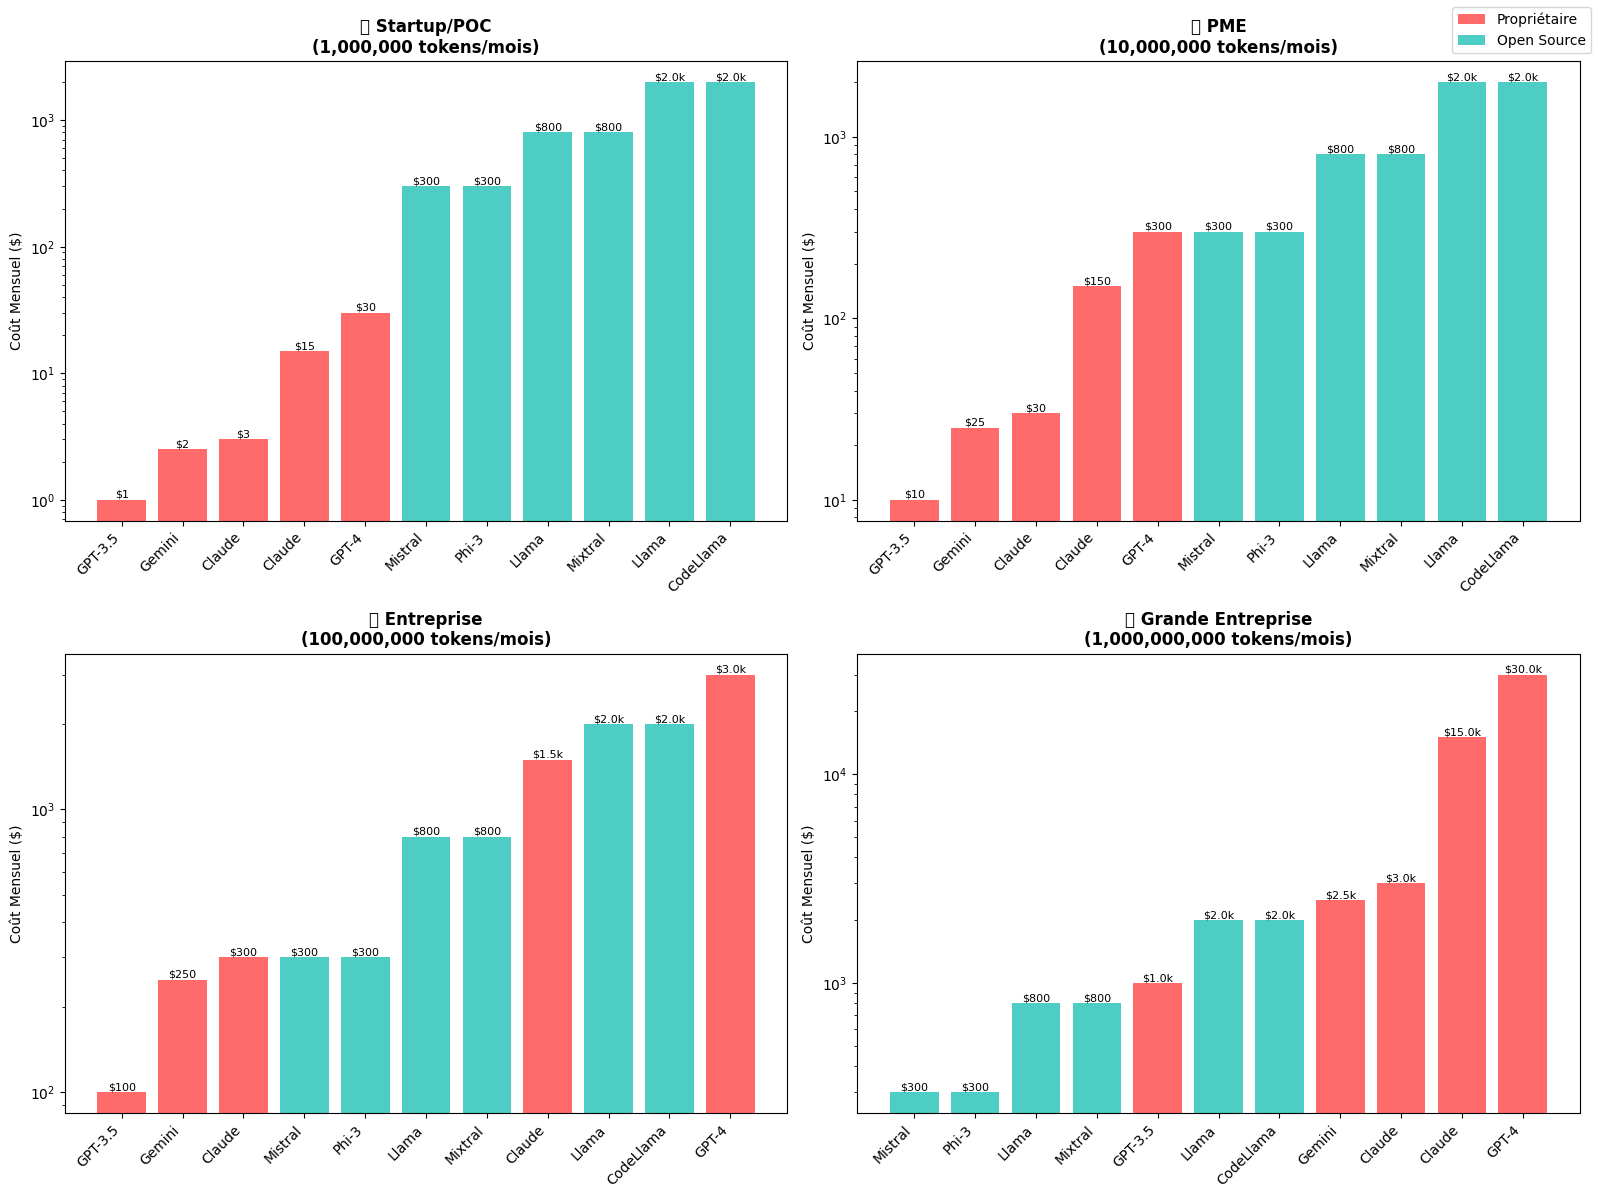

💡 Observations clés :
  📈 Les coûts explosent avec le volume (APIs propriétaires)
  💚 Open source = coût fixe (hébergement) indépendant du volume
  🎯 Point de bascule vers open source : 10-50M tokens/mois


In [5]:
# Visualisation des coûts par scénario
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (scenario, tokens) in enumerate(scenarios.items()):
    scenario_data = df_cout[df_cout['Scénario'] == scenario].sort_values('Coût_Mensuel')
    
    # Séparer propriétaires et open source
    colors = ['#FF6B6B' if 'GPT\|Claude\|Gemini' in model else '#4ECDC4' 
              for model in scenario_data['Modèle']]
    
    bars = axes[i].bar(range(len(scenario_data)), scenario_data['Coût_Mensuel'], 
                       color=['#FF6B6B' if any(prop in model for prop in ['GPT', 'Claude', 'Gemini']) 
                             else '#4ECDC4' for model in scenario_data['Modèle']])
    
    axes[i].set_title(f'💰 {scenario}\n({tokens:,} tokens/mois)', fontweight='bold')
    axes[i].set_ylabel('Coût Mensuel ($)')
    axes[i].set_xticks(range(len(scenario_data)))
    axes[i].set_xticklabels([m.split()[0] for m in scenario_data['Modèle']], 
                           rotation=45, ha='right')
    
    # Échelle logarithmique pour les gros montants
    if scenario_data['Coût_Mensuel'].max() > 1000:
        axes[i].set_yscale('log')
    
    # Ajouter les valeurs sur les barres
    for bar, cost in zip(bars, scenario_data['Coût_Mensuel']):
        if cost < 1000:
            label = f'${cost:.0f}'
        else:
            label = f'${cost/1000:.1f}k'
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                    label, ha='center', va='bottom', fontsize=8)

# Légende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='Propriétaire'),
                   Patch(facecolor='#4ECDC4', label='Open Source')]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("💡 Observations clés :")
print("  📈 Les coûts explosent avec le volume (APIs propriétaires)")
print("  💚 Open source = coût fixe (hébergement) indépendant du volume")
print("  🎯 Point de bascule vers open source : 10-50M tokens/mois")

## ⚡ Analyse de Performance vs Latence

### 🏁 Le Dilemme Vitesse vs Qualité

In [6]:
# Graphique scatter Performance vs Latence
fig = go.Figure()

# Ajouter les points par type
for model_type in ['Propriétaire', 'Open Source']:
    subset = df_models[df_models['Type'] == model_type]
    
    fig.add_trace(go.Scatter(
        x=subset['Latence_Seconde'],
        y=subset['Performance_MMLU'],
        mode='markers+text',
        name=model_type,
        text=[m.split()[0] for m in subset['Modèle']],
        textposition='top center',
        marker=dict(
            size=15,
            symbol='circle' if model_type == 'Propriétaire' else 'diamond',
            color='#FF6B6B' if model_type == 'Propriétaire' else '#4ECDC4',
            line=dict(width=2, color='white')
        )
    ))

# Zones d'excellence
fig.add_shape(
    type="rect",
    x0=0, y0=80, x1=2, y1=90,
    fillcolor="lightgreen", opacity=0.2,
    line_width=0
)
fig.add_annotation(
    x=1, y=85, text="🏆 Zone d'Excellence<br>(Rapide + Performant)",
    showarrow=False, font=dict(size=12, color="green")
)

fig.update_layout(
    title="⚡ Performance vs Latence - Le Sweet Spot",
    xaxis_title="Latence (secondes) - Plus bas = mieux",
    yaxis_title="Performance MMLU (%) - Plus haut = mieux",
    height=600,
    showlegend=True
)

fig.show()

# Calculer l'efficacité (Performance / Latence)
df_models['Efficacité'] = df_models['Performance_MMLU'] / df_models['Latence_Seconde']

print("🏆 TOP 5 - Meilleure Efficacité (Performance/Latence) :")
top_efficiency = df_models.nlargest(5, 'Efficacité')[['Modèle', 'Performance_MMLU', 'Latence_Seconde', 'Efficacité']]
for i, (_, row) in enumerate(top_efficiency.iterrows(), 1):
    print(f"  {i}. {row['Modèle']:20s} - Efficacité: {row['Efficacité']:.1f} (MMLU: {row['Performance_MMLU']:.1f}%, Latence: {row['Latence_Seconde']:.1f}s)")

🏆 TOP 5 - Meilleure Efficacité (Performance/Latence) :
  1. Phi-3 Mini           - Efficacité: 86.0 (MMLU: 68.8%, Latence: 0.8s)
  2. Mistral 7B           - Efficacité: 62.5 (MMLU: 62.5%, Latence: 1.0s)
  3. GPT-3.5 Turbo        - Efficacité: 58.3 (MMLU: 70.0%, Latence: 1.2s)
  4. Claude 3 Sonnet      - Efficacité: 43.9 (MMLU: 79.0%, Latence: 1.8s)
  5. Gemini Pro           - Efficacité: 41.9 (MMLU: 83.7%, Latence: 2.0s)


## 🔒 Privacy et Sécurité - Le Facteur Critique

### 🛡️ Niveaux de Confidentialité

#### Niveau 1 : 🌐 APIs Publiques
**Modèles** : GPT-4, Claude, Gemini
- ✅ **Avantages** : Facile, pas d'infrastructure
- ❌ **Risques** : Données envoyées aux serveurs du fournisseur
- 🎯 **Usage** : Données non sensibles, prototypage

#### Niveau 2 : 🏢 APIs Dédiées
**Modèles** : Azure OpenAI, AWS Bedrock
- ✅ **Avantages** : Meilleur contrôle, SLA
- ✅ **Sécurité** : VPC, chiffrement
- 💰 **Coût** : Plus cher que les APIs publiques

#### Niveau 3 : 🏠 Hébergement Local
**Modèles** : Llama 2, Mistral, CodeLlama
- ✅ **Contrôle total** : Données ne sortent jamais
- ✅ **Personnalisation** : Fine-tuning possible
- ❌ **Complexité** : Infrastructure, maintenance
- 💰 **Coût** : GPU, serveurs, expertise

In [7]:
# Matrice Privacy vs Performance vs Coût
fig = go.Figure()

# Calculer un score de valeur (Performance / (Coût + 1))
# +1 pour éviter division par zéro avec modèles gratuits
startup_costs = df_cout[df_cout['Scénario'] == 'Startup/POC'].set_index('Modèle')['Coût_Mensuel']
df_models['Coût_Startup'] = df_models['Modèle'].map(startup_costs)
df_models['Score_Valeur'] = df_models['Performance_MMLU'] / (df_models['Coût_Startup'] + 1)

# Graphique à bulles 3D
fig.add_trace(go.Scatter(
    x=df_models['Privacy_Score'],
    y=df_models['Performance_MMLU'],
    mode='markers+text',
    text=[m.split()[0] for m in df_models['Modèle']],
    textposition='top center',
    marker=dict(
        size=df_models['Score_Valeur'] * 5,  # Taille = rapport qualité/prix
        color=df_models['Coût_Startup'],
        colorscale='RdYlGn_r',  # Rouge = cher, Vert = gratuit
        showscale=True,
        colorbar=dict(title="Coût Mensuel ($)"),
        line=dict(width=2, color='white')
    )
))

# Zones de recommandation
fig.add_shape(
    type="rect", x0=8, y0=60, x1=10, y1=90,
    fillcolor="lightblue", opacity=0.2, line_width=0
)
fig.add_annotation(
    x=9, y=75, text="🔒 Zone Privacy<br>(Données sensibles)",
    showarrow=False, font=dict(size=10, color="blue")
)

fig.add_shape(
    type="rect", x0=0, y0=80, x1=5, y1=90,
    fillcolor="lightcoral", opacity=0.2, line_width=0
)
fig.add_annotation(
    x=2.5, y=85, text="⚡ Zone Performance<br>(APIs premium)",
    showarrow=False, font=dict(size=10, color="darkred")
)

fig.update_layout(
    title="🔒 Privacy vs Performance vs Coût<br><sub>Taille des bulles = Rapport Qualité/Prix</sub>",
    xaxis_title="Score Privacy (2=API publique, 10=Local)",
    yaxis_title="Performance MMLU (%)",
    height=600
)

fig.show()

print("🎯 Guide de lecture :")
print("  🔒 Droite = Plus de privacy (local)")
print("  📈 Haut = Plus de performance")
print("  💚 Vert = Moins cher")
print("  🔴 Rouge = Plus cher")
print("  🎈 Grosse bulle = Meilleur rapport qualité/prix")

🎯 Guide de lecture :
  🔒 Droite = Plus de privacy (local)
  📈 Haut = Plus de performance
  💚 Vert = Moins cher
  🔴 Rouge = Plus cher
  🎈 Grosse bulle = Meilleur rapport qualité/prix


## 📏 Benchmarks et Métriques Détaillées

### 🧪 Les Principaux Benchmarks

#### 1. 📚 MMLU (Massive Multitask Language Understanding)
- **Quoi** : 15,908 questions sur 57 matières académiques
- **Mesure** : Connaissances générales
- **Format** : QCM à 4 choix
- **Importance** : ⭐⭐⭐⭐⭐ (référence universelle)

#### 2. 🤔 HellaSwag
- **Quoi** : Complétion de phrases du quotidien
- **Mesure** : Bon sens et compréhension contextuelle
- **Exemple** : "Je verse de l'eau dans une bouilloire pour..." → "faire du thé"
- **Importance** : ⭐⭐⭐⭐ (pratique)

#### 3. 💻 HumanEval
- **Quoi** : 164 problèmes de programmation
- **Mesure** : Génération de code Python
- **Format** : Code qui passe les tests unitaires
- **Importance** : ⭐⭐⭐⭐⭐ (si vous faites du code)

#### 4. 💬 MT-Bench
- **Quoi** : Conversations multi-tours avec un juge IA
- **Mesure** : Qualité conversationnelle
- **Format** : Scores de 1 à 10
- **Importance** : ⭐⭐⭐⭐ (pour chatbots)

#### 5. ✅ TruthfulQA
- **Quoi** : Questions piège avec désinformation
- **Mesure** : Véracité vs hallucinations
- **Exemple** : "Combien de reins ont les humains ?" → "Deux" (pas "Trois")
- **Importance** : ⭐⭐⭐⭐⭐ (factuel critique)

In [8]:
# Données de benchmarks étendues
benchmark_data = {
    'Modèle': [
        'GPT-4', 'Claude 3 Opus', 'Gemini Pro', 'GPT-3.5 Turbo',
        'Llama 2 70B', 'Mixtral 8x7B', 'Mistral 7B', 'CodeLlama 34B',
        'Llama 2 13B', 'Phi-3 Mini'
    ],
    'MMLU': [86.4, 86.8, 83.7, 70.0, 68.9, 70.6, 62.5, 53.7, 54.8, 68.8],
    'HellaSwag': [95.3, 95.4, 92.0, 85.5, 87.3, 87.6, 83.3, 76.2, 82.1, 82.4],
    'HumanEval': [67.0, 22.0, 32.3, 48.1, 29.9, 40.2, 29.8, 48.0, 18.3, 62.2],
    'TruthfulQA': [59.0, 69.3, 47.3, 47.3, 52.8, 54.1, 50.3, 43.6, 47.1, 44.1],
    'MT_Bench': [8.96, 8.85, 8.0, 7.94, 6.86, 8.30, 7.60, 6.13, 6.65, 8.38]
}

df_benchmarks = pd.DataFrame(benchmark_data)

# Graphique radar multi-modèles
fig = go.Figure()

categories = ['MMLU', 'HellaSwag', 'HumanEval', 'TruthfulQA', 'MT-Bench']

# Normaliser MT-Bench sur 100 (actuellement sur 10)
df_benchmarks['MT_Bench_Norm'] = df_benchmarks['MT_Bench'] * 10

# Sélectionner quelques modèles représentatifs
models_to_show = ['GPT-4', 'Claude 3 Opus', 'Mixtral 8x7B', 'Mistral 7B', 'Phi-3 Mini']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for i, model in enumerate(models_to_show):
    if model in df_benchmarks['Modèle'].values:
        row = df_benchmarks[df_benchmarks['Modèle'] == model].iloc[0]
        values = [
            row['MMLU'], row['HellaSwag'], row['HumanEval'], 
            row['TruthfulQA'], row['MT_Bench_Norm']
        ]
        
        fig.add_trace(go.Scatterpolar(
            r=values + [values[0]],
            theta=categories + [categories[0]],
            fill='toself',
            name=model,
            line_color=colors[i],
            opacity=0.6
        ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    title="📊 Comparaison Multi-Benchmarks<br><sub>MT-Bench normalisé à 100</sub>",
    showlegend=True,
    height=600
)

fig.show()

# Analyse des forces/faiblesses
print("🎯 Analyse des spécialisations :")
print("\n💻 Meilleurs en Code (HumanEval) :")
code_leaders = df_benchmarks.nlargest(3, 'HumanEval')[['Modèle', 'HumanEval']]
for _, row in code_leaders.iterrows():
    print(f"  • {row['Modèle']:20s}: {row['HumanEval']:.1f}%")

print("\n✅ Meilleurs en Véracité (TruthfulQA) :")
truth_leaders = df_benchmarks.nlargest(3, 'TruthfulQA')[['Modèle', 'TruthfulQA']]
for _, row in truth_leaders.iterrows():
    print(f"  • {row['Modèle']:20s}: {row['TruthfulQA']:.1f}%")

print("\n💬 Meilleurs en Conversation (MT-Bench) :")
chat_leaders = df_benchmarks.nlargest(3, 'MT_Bench')[['Modèle', 'MT_Bench']]
for _, row in chat_leaders.iterrows():
    print(f"  • {row['Modèle']:20s}: {row['MT_Bench']:.1f}/10")

🎯 Analyse des spécialisations :

💻 Meilleurs en Code (HumanEval) :
  • GPT-4               : 67.0%
  • Phi-3 Mini          : 62.2%
  • GPT-3.5 Turbo       : 48.1%

✅ Meilleurs en Véracité (TruthfulQA) :
  • Claude 3 Opus       : 69.3%
  • GPT-4               : 59.0%
  • Mixtral 8x7B        : 54.1%

💬 Meilleurs en Conversation (MT-Bench) :
  • GPT-4               : 9.0/10
  • Claude 3 Opus       : 8.8/10
  • Phi-3 Mini          : 8.4/10


## 🎯 Score de Recommandation Personnalisé

### 🔧 Créer Votre Propre Système de Scoring

In [9]:
def calculer_score_personnalise(df, poids_criteres):
    """
    Calcule un score personnalisé basé sur vos priorités
    
    poids_criteres : dict avec les poids de chaque critère (somme = 1.0)
    {
        'performance': 0.3,  # 30% du score
        'cout': 0.2,         # 20% du score
        'latence': 0.2,      # 20% du score
        'privacy': 0.1,      # 10% du score
        'integration': 0.1,  # 10% du score
        'scalability': 0.1   # 10% du score
    }
    """
    df_score = df.copy()
    
    # Normaliser chaque critère entre 0 et 100
    # Performance : plus haut = mieux
    df_score['Score_Performance'] = (df_score['Performance_MMLU'] / df_score['Performance_MMLU'].max()) * 100
    
    # Coût : plus bas = mieux (inverse du coût pour startup)
    max_cost = df_score['Coût_Startup'].max()
    df_score['Score_Cout'] = ((max_cost - df_score['Coût_Startup']) / max_cost) * 100
    
    # Latence : plus bas = mieux (inverse)
    max_latence = df_score['Latence_Seconde'].max()
    df_score['Score_Latence'] = ((max_latence - df_score['Latence_Seconde']) / max_latence) * 100
    
    # Privacy : plus haut = mieux
    df_score['Score_Privacy'] = (df_score['Privacy_Score'] / df_score['Privacy_Score'].max()) * 100
    
    # Integration & Scalability : déjà sur 10, normaliser à 100
    df_score['Score_Integration'] = df_score['Integration_Score'] * 10
    df_score['Score_Scalability'] = df_score['Scalability_Score'] * 10
    
    # Calculer le score final pondéré
    df_score['Score_Final'] = (
        df_score['Score_Performance'] * poids_criteres.get('performance', 0) +
        df_score['Score_Cout'] * poids_criteres.get('cout', 0) +
        df_score['Score_Latence'] * poids_criteres.get('latence', 0) +
        df_score['Score_Privacy'] * poids_criteres.get('privacy', 0) +
        df_score['Score_Integration'] * poids_criteres.get('integration', 0) +
        df_score['Score_Scalability'] * poids_criteres.get('scalability', 0)
    )
    
    return df_score.sort_values('Score_Final', ascending=False)

# Profils types d'utilisateurs
profils = {
    'Startup Tech': {
        'description': 'Prototype rapide, budget limité',
        'poids': {'performance': 0.2, 'cout': 0.4, 'latence': 0.1, 'privacy': 0.05, 'integration': 0.2, 'scalability': 0.05}
    },
    'Entreprise Sécurisée': {
        'description': 'Données sensibles, sécurité prioritaire',
        'poids': {'performance': 0.25, 'cout': 0.1, 'latence': 0.1, 'privacy': 0.4, 'integration': 0.1, 'scalability': 0.05}
    },
    'App Temps Réel': {
        'description': 'Latence critique, haute performance',
        'poids': {'performance': 0.3, 'cout': 0.15, 'latence': 0.4, 'privacy': 0.05, 'integration': 0.05, 'scalability': 0.05}
    },
    'Recherche Académique': {
        'description': 'Performance max, coût secondaire',
        'poids': {'performance': 0.5, 'cout': 0.1, 'latence': 0.1, 'privacy': 0.1, 'integration': 0.1, 'scalability': 0.1}
    },
    'Production Enterprise': {
        'description': 'Fiabilité et scalabilité',
        'poids': {'performance': 0.2, 'cout': 0.2, 'latence': 0.15, 'privacy': 0.15, 'integration': 0.15, 'scalability': 0.15}
    }
}

# Calculer les recommandations pour chaque profil
resultats = {}

for profil_nom, profil_data in profils.items():
    resultats[profil_nom] = calculer_score_personnalise(df_models, profil_data['poids'])
    
    print(f"\n🎯 TOP 3 pour {profil_nom} ({profil_data['description']}) :")
    top3 = resultats[profil_nom].head(3)
    for i, (_, row) in enumerate(top3.iterrows(), 1):
        medal = ['🥇', '🥈', '🥉'][i-1]
        print(f"  {medal} {row['Modèle']:20s} - Score: {row['Score_Final']:.1f}/100")
        print(f"      Performance: {row['Score_Performance']:.0f}, Coût: {row['Score_Cout']:.0f}, "
              f"Latence: {row['Score_Latence']:.0f}, Privacy: {row['Score_Privacy']:.0f}")


🎯 TOP 3 pour Startup Tech (Prototype rapide, budget limité) :
  🥇 GPT-3.5 Turbo        - Score: 89.7/100
      Performance: 81, Coût: 100, Latence: 76, Privacy: 20
  🥈 GPT-4                - Score: 88.3/100
      Performance: 100, Coût: 98, Latence: 30, Privacy: 20
  🥉 Claude 3 Sonnet      - Score: 88.0/100
      Performance: 91, Coût: 100, Latence: 64, Privacy: 20

🎯 TOP 3 pour Entreprise Sécurisée (Données sensibles, sécurité prioritaire) :
  🥇 Phi-3 Mini           - Score: 86.7/100
      Performance: 79, Coût: 85, Latence: 84, Privacy: 100
  🥈 Mistral 7B           - Score: 84.5/100
      Performance: 72, Coût: 85, Latence: 80, Privacy: 100
  🥉 Mixtral 8x7B         - Score: 79.3/100
      Performance: 81, Coût: 60, Latence: 30, Privacy: 100

🎯 TOP 3 pour App Temps Réel (Latence critique, haute performance) :
  🥇 Phi-3 Mini           - Score: 81.6/100
      Performance: 79, Coût: 85, Latence: 84, Privacy: 100
  🥈 GPT-3.5 Turbo        - Score: 80.6/100
      Performance: 81, Coût: 100

In [10]:
# Visualisation des recommandations par profil
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=list(profils.keys()),
    vertical_spacing=0.08
)

positions = [(1,1), (1,2), (2,1), (2,2), (3,1)]

for i, (profil_nom, profil_data) in enumerate(profils.items()):
    if i < len(positions):
        row, col = positions[i]
        
        top5 = resultats[profil_nom].head(5)
        
        fig.add_trace(
            go.Bar(
                x=[m.split()[0] for m in top5['Modèle']],
                y=top5['Score_Final'],
                name=profil_nom,
                showlegend=False,
                marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
            ),
            row=row, col=col
        )
        
        # Ajouter les scores sur les barres
        for j, (_, model_row) in enumerate(top5.iterrows()):
            fig.add_annotation(
                x=j, y=model_row['Score_Final'] + 2,
                text=f"{model_row['Score_Final']:.0f}",
                showarrow=False,
                row=row, col=col,
                font=dict(size=10)
            )

fig.update_layout(
    title="🎯 Recommandations par Profil d'Utilisateur",
    height=800,
    showlegend=False
)

# Mettre à jour les axes Y
for i in range(1, 4):
    for j in range(1, 3):
        fig.update_yaxes(title_text="Score", range=[0, 100], row=i, col=j)

fig.show()

print("\n💡 Observations clés :")
print("  🏢 Startup → Modèles open source (Mistral, Llama) pour le coût")
print("  🔒 Sécurité → Modèles locaux obligatoires (Llama 2, CodeLlama)")
print("  ⚡ Temps réel → Mistral 7B et Phi-3 Mini excellent")
print("  🎓 Recherche → GPT-4 et Claude 3 dominent")
print("  🏭 Production → Équilibre entre tous les critères")


💡 Observations clés :
  🏢 Startup → Modèles open source (Mistral, Llama) pour le coût
  🔒 Sécurité → Modèles locaux obligatoires (Llama 2, CodeLlama)
  ⚡ Temps réel → Mistral 7B et Phi-3 Mini excellent
  🎓 Recherche → GPT-4 et Claude 3 dominent
  🏭 Production → Équilibre entre tous les critères


## 🎯 Conclusions et Recommandations

### ✅ Points Clés à Retenir :

1. **🎯 Pas de solution universelle**
   - Le "meilleur" modèle dépend de VOS critères
   - Toujours définir ses priorités avant de choisir

2. **💰 Le coût peut exploser**
   - APIs propriétaires : coût proportionnel au volume
   - Open source : coût fixe d'hébergement
   - Point de bascule : ~10-50M tokens/mois

3. **🔒 Privacy = contrainte forte**
   - Données sensibles → Hébergement local obligatoire
   - Coût et complexité technique significatifs

4. **⚡ Performance vs Latence**
   - Mistral 7B et Phi-3 Mini : excellent rapport
   - GPT-4 : max performance mais lent
   - Choisir selon cas d'usage (temps réel vs qualité)

5. **📊 Utiliser les bons benchmarks**
   - MMLU : connaissances générales
   - HumanEval : génération de code
   - MT-Bench : conversation
   - TruthfulQA : véracité

### 🛠️ Méthodologie Recommandée :

1. **📋 Définir vos critères** (performance, coût, privacy, latence)
2. **⚖️ Pondérer vos priorités** (comme dans les profils)
3. **🔍 Filtrer les candidats** (benchmarks, leaderboards)
4. **🧪 Tester avec vos données** (POC sur 2-3 finalistes)
5. **📈 Mesurer et comparer** (qualité, coût, latence réels)
6. **✅ Décider** basé sur données, pas sur marketing

### 🚀 Prochaine Étape :

Dans le **notebook suivant**, nous allons faire des **tests pratiques** et comparer les modèles sur de vraies tâches !

---

**🎉 Félicitations ! Vous savez maintenant évaluer et comparer les LLM comme un pro !**